### Problem statement - There are times when a user writes Good, Nice App or any other positive text, in the review and gives 1-star rating. Your goal is to identify the reviews where the semantics of review text does not match rating. 

### Your goal is to identify such ratings where review text is good, but rating is negative- so that the support team can point this to users.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")
data = pd.read_csv('chrome_reviews.csv')
pd.set_option("display.max_columns", None)
display(data.head())


,ID,Review URL,Text,Star,Thumbs Up,User Name,Developer Reply,Version,Review Date,App ID
0,3886,https://play.google.com/store/apps/details?id=...,This is very helpfull aap.,5,0,INDIAN Knowledge,NaN,83.0.4103.106,2020-12-19,com.android.chrome
1,3887,https://play.google.com/store/apps/details?id=...,Good,3,2,Ijeoma Happiness,NaN,85.0.4183.127,2020-12-19,com.android.chrome
2,3888,https://play.google.com/store/apps/details?id=...,Not able to update. Neither able to uninstall.,1,0,Priti D BtCFs-29,NaN,85.0.4183.127,2020-12-19,com.android.chrome
3,3889,https://play.google.com/store/apps/details?id=...,Nice app,4,0,Ajeet Raja,NaN,77.0.3865.116,2020-12-19,com.android.chrome
4,3890,https://play.google.com/store/apps/details?id=...,Many unwanted ads,1,0,Rams Mp,NaN,87.0.4280.66,2020-12-19,com.android.chrome


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7204 entries, 0 to 7203
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ID               7204 non-null   int64 
 1   Review URL       7204 non-null   object
 2   Text             7203 non-null   object
 3   Star             7204 non-null   int64 
 4   Thumbs Up        7204 non-null   int64 
 5   User Name        7204 non-null   object
 6   Developer Reply  95 non-null     object
 7   Version          7119 non-null   object
 8   Review Date      7204 non-null   object
 9   App ID           7204 non-null   object
dtypes: int64(3), object(7)
memory usage: 562.9+ KB


In [3]:
df = data[['Text','Star']]
df.head()

,Text,Star
0,This is very helpfull aap.,5
1,Good,3
2,Not able to update. Neither able to uninstall.,1
3,Nice app,4
4,Many unwanted ads,1


In [4]:
null_val = [val for val in df.columns if df[val].isnull().any()]
len(null_val)

1

In [5]:
df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7204 entries, 0 to 7203
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    7203 non-null   object
 1   Star    7204 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 112.7+ KB


In [6]:
#import natural language tool kit
import nltk
import re #regular expressions module

nltk.download('stopwords')
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
#declaring porter stemmer
port = PorterStemmer()
def text_cleaner (text): #function to clean text
    cleaned= re.sub('[^a-zA-Z]', " ", text) 
    cleaned= cleaned.lower()
    cleaned = cleaned.split()
    cleaned= [port.stem (word) for word in cleaned if word not in stopwords.words("english")]
    cleaned= ' '.join(cleaned)
    return cleaned

In [8]:
df["Cleaned_Text"] = df["Text"].apply(lambda x: text_cleaner(str(x))) #declare cleaned text feature
df["Length"] = df["Text"].apply(lambda x:len(str(x))) #declare length feature
df.head()

,Text,Star,Cleaned_Text,Length
0,This is very helpfull aap.,5,helpful aap,26
1,Good,3,good,4
2,Not able to update. Neither able to uninstall.,1,abl updat neither abl uninstal,46
3,Nice app,4,nice app,8
4,Many unwanted ads,1,mani unwant ad,17


In [9]:
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer

def sentiment_vader(text, sid):
    ss = sid.polarity_scores(text)
    ss.pop('compound')
    return max(ss, key=ss.get)

In [10]:
def sentiment_textblob(text):
        x = TextBlob(text).sentiment.polarity
        
        if x<0:
            return 'negative'
        elif x==0:
            return 'neutral'
        else:
            return 'positive'

def plot_sentiment_barchart(text, method='TextBlob'):
    if method == 'TextBlob':
        sentiment = text.map(lambda x: sentiment_textblob(x))
    elif method == 'Vader':
        nltk.download('vader_lexicon')
        sid = SentimentIntensityAnalyzer()
        sentiment = text.map(lambda x: sentiment_vader(x, sid=sid))
    else:
        raise ValueError('Textblob or Vader')
    
    plt.bar(sentiment.value_counts().index,
            sentiment.value_counts())

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


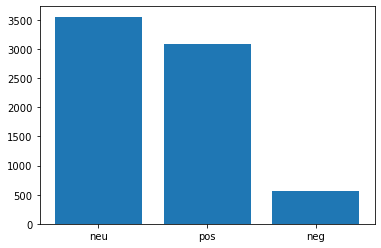

In [11]:
plot_sentiment_barchart(df['Cleaned_Text'], method='Vader')

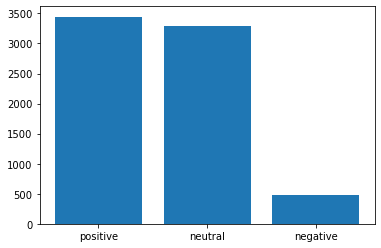

In [12]:
plot_sentiment_barchart(df['Cleaned_Text'], method='TextBlob')

In [13]:
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [14]:
df["Vader_Score"] = df["Cleaned_Text"].apply(lambda review:sid.polarity_scores(review))

In [15]:
df["Vader_Compound_Score"]  = df['Vader_Score'].apply(lambda score_dict: score_dict['compound'])

In [16]:
df["Result"] = df["Vader_Compound_Score"].apply(lambda c: 'positive' if c > 0 else ('negative' if c < 0 else 'neutral'))
df.head()

,Text,Star,Cleaned_Text,Length,Vader_Score,Vader_Compound_Score,Result
0,This is very helpfull aap.,5,helpful aap,26,"{'neg': 0.0, 'neu': 0.263, 'pos': 0.737, 'comp...",0.4215,positive
1,Good,3,good,4,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",0.4404,positive
2,Not able to update. Neither able to uninstall.,1,abl updat neither abl uninstal,46,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral
3,Nice app,4,nice app,8,"{'neg': 0.0, 'neu': 0.263, 'pos': 0.737, 'comp...",0.4215,positive
4,Many unwanted ads,1,mani unwant ad,17,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral


In [17]:
df_focus = df[(df.Result == "positive")]
df_focus.head()

,Text,Star,Cleaned_Text,Length,Vader_Score,Vader_Compound_Score,Result
0,This is very helpfull aap.,5,helpful aap,26,"{'neg': 0.0, 'neu': 0.263, 'pos': 0.737, 'comp...",0.4215,positive
1,Good,3,good,4,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",0.4404,positive
3,Nice app,4,nice app,8,"{'neg': 0.0, 'neu': 0.263, 'pos': 0.737, 'comp...",0.4215,positive
5,This app good,4,app good,13,"{'neg': 0.0, 'neu': 0.256, 'pos': 0.744, 'comp...",0.4404,positive
10,Good,5,good,4,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",0.4404,positive


In [18]:
Suggestion = []
for row in df_focus["Star"] :
    if row >= 3 :
         Suggestion.append("No Focus Needed")
    else :
         Suggestion.append("Focus Needed")
            
df_focus["Suggestion"] = Suggestion
df_focus.head()

,Text,Star,Cleaned_Text,Length,Vader_Score,Vader_Compound_Score,Result,Suggestion
0,This is very helpfull aap.,5,helpful aap,26,"{'neg': 0.0, 'neu': 0.263, 'pos': 0.737, 'comp...",0.4215,positive,No Focus Needed
1,Good,3,good,4,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",0.4404,positive,No Focus Needed
3,Nice app,4,nice app,8,"{'neg': 0.0, 'neu': 0.263, 'pos': 0.737, 'comp...",0.4215,positive,No Focus Needed
5,This app good,4,app good,13,"{'neg': 0.0, 'neu': 0.256, 'pos': 0.744, 'comp...",0.4404,positive,No Focus Needed
10,Good,5,good,4,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",0.4404,positive,No Focus Needed


In [19]:
df_focus.Suggestion.value_counts()

No Focus Needed    3192
Focus Needed        491
Name: Suggestion, dtype: int64

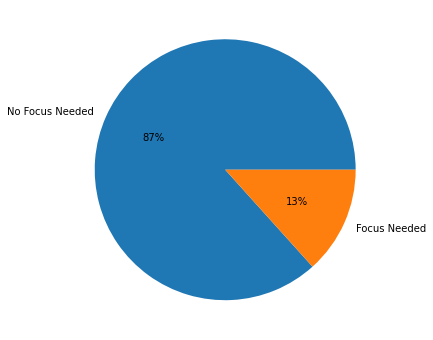

In [20]:
plt.figure(figsize=(8,6))
plt.pie(df_focus["Suggestion"].value_counts(), labels = df_focus["Suggestion"].value_counts().index, autopct="%.0f%%")
plt.show()

In [21]:
keyword = ['good','nice','thank you','best','awesome','helpful']

In [23]:
final = df_focus[(df_focus["Suggestion"] == "Focus Needed")]
final = final[final["Cleaned_Text"].isin(keyword)]
final.drop(final.iloc[:, 3:7], inplace = True, axis = 1)
display(final.head())
print(f"There are about {len(final.Suggestion)} reviews that are positive but have a bad rating")

,Text,Star,Cleaned_Text,Suggestion
101,Good,1,good,Focus Needed
158,Good,1,good,Focus Needed
310,Best,1,best,Focus Needed
312,Good,1,good,Focus Needed
315,Nice,1,nice,Focus Needed


There are about 72 reviews that are positive but have a bad rating
